# Inception 家族讲解

## filter 的大小的作用是什么

![conv-filter1.jpeg](image/conv-filter1.jpeg)


**左图**

假设卷积核（又叫filter，neuron）是3`*`3,第一层卷积核的中心pixel，可以“看到”（receptive field）输入图3`*`3的区域（这里把它理解成“连通性”），第二层卷积核作用在第一层之上，这个卷积核的中心pixel可以“看到”原图的区域扩大成5*5.


**右图**

把三个3`*`3的卷积核堆积起来，第三层中的一个pixel，可以“看到”原图的pixel个数，和一个7*7卷积核一样。

## 卷积核数量不同，影响什么？

![cnn.jpeg](image/cnn.jpeg)

## mean pooling 和 max pooling 的区别？

- 最大池化可以提取特征纹理， 最大池化提取边缘等“最重要”的特征
- 平均池化可以保留背景信息，平均池化提取的特征更加smoothly

## 设计网络似乎是一个玄学？有没有能够起到指导作用的原则呢？

## Inception v1

[paper 原文](https://arxiv.org/pdf/1409.4842v1.pdf)

### 我们来分析下，之前做过的任务中的一些特点：

- ![dogs.jpeg](image/dogs.jpeg)
图片中突出的部分存在非常的尺寸变动 (size variation)

- 由于大的卷积核能够捕获跟全局的信息，晓得卷积核能够捕获更具不的信息。所以在卷积神经网络中，找到一个合适的卷积核的大小非常的不容易

- 很深的网络很容易就过拟合了，并且也很难把梯度更新到整个网络上

- 简单的堆叠卷积操作的计算量会越来越大


### Inception v1 的解决办法：

- 为什么不能在同一个级别同时使用多种不同大小的卷积核呢？

![inception-module.png](image/inception-module.png)

It performs convolution on an input, with 3 different sizes of filters (1x1, 3x3, 5x5). Additionally, max pooling is also performed. The outputs are concatenated and sent to the next inception module.

- 深度网络的计算量很大，为了能够减小这种计算量，作者通过一种结构限制了输入的 channel 数量。这种特殊的结构就是在卷积核前面增加 1`*`1 的卷积。

![inception-module-with-dimension.png](image/inception-module-with-dimension.png)

- 为什么 1`*`1 的卷积能够限制 channel 数量呢？

![1-1conv-filter.png](image/1-1conv-filter.png)
除了能够限制 channel 数量，它还有一些好处：
- 通过卷积的激活函在 feature map 尺度不变的情况下增加非线性
- 跨通道信息交互（channal 的变换）

**以上这些就是 Inception v1 提出的 Inception Module**

使用 Inception Module 构建了 Inception v1 的结构，或者也可以叫做 GoogLeNet。

![inception-v1.png](image/inception-v1.png)

整个结构使用了 9 个 Inception Modules 线性堆叠而成，总共有 22 层（如果包含 Pooling 层是 27层），并且在最后一个 Inception Module 后面增加了 average pooling。

这是一个相当深的结构，为了缓解梯度消失的问题，作者又在这个结构的基础上增加了两个辅助分类器。这两个分类器同样训练数据进行训练。并且，在损失函数部分，把这两部分的损失加到最后的损失函数中去。


![incepiton-v1-loss.png.png](image/incepiton-v1-loss.png.png)





## Inception v2

Inception v2 和 v3 都发布自同一篇论文，[论文原文](https://arxiv.org/pdf/1512.00567v3.pdf)

在这篇论文中，作者对 v1 提出了一些改进，用来提升准确率，并且减少计算量。

- 减少表达瓶颈 (representational bottleneck)。

一个直观的感觉是，当神经网络的维度不剧烈的改变输入的维度时，神经网络的性能会更好。过多的减少表示维度，会丢失大量的信息，这被称为是 `表达瓶颈`

- 使用分解的方法，可以降低卷积的计算量


* 把 `5*5` 的卷积分解成两个 `3*3` 的卷积，可以提升计算速度。通过实验发现，一个 `5*5` 的卷积的计算时间是一个 `3*3` 卷积计算速度的 2.78 倍。

    - 1）在具有相同感知野的条件下，提升了网络的深度，在一定程度上提升了神经网络的效果；

    - 2）降低了参数量（从5×5×1 x channels 到 3×3×2 x channels）。

>（W - F + 2P）/ S + 1
>
> 其中，W是输入尺寸，F是卷积核大小，P是填充尺寸，S是步长

他们经过转换后，得到的 feature map 大小是一致的。

![2-3-3filters.jpg](image/2-3-3filters.jpg)
**Figure 5**


- 把 `n*n` 的卷积分解成 `1*n` 和 `n*1` 的卷积。 这种方法，可以减少大概 33% 的计算量。

![1*nfilters.jpg](image/1*nfilters.jpg)
**Figure 6**

- 为了不让网络过深，他们采用了让网络更宽的方法

![wider.jpg](image/wider.jpg)
**Figure 7**

最后的结构如下：
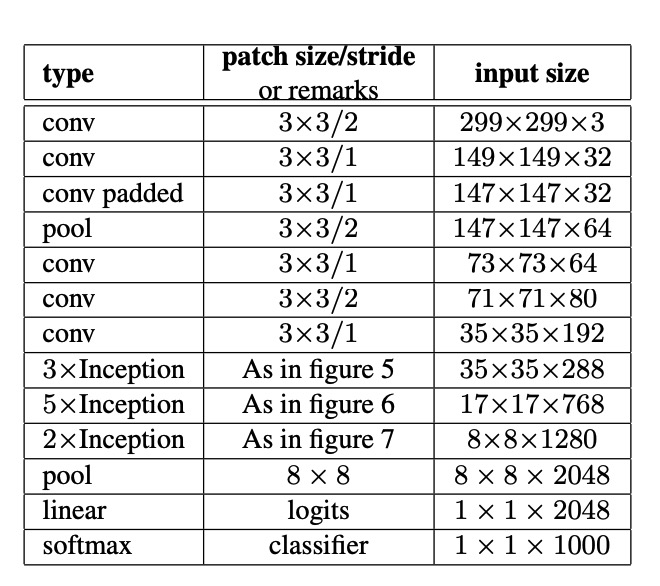

## Inception v3

- 作者发现辅助分类器在训练的后期，当训练接近饱和的状态下，并不能贡献很多。他们尝试使用正则化技术。
- 不大幅度更改 v2 的结构


* RMSProp Optimizer.
* Factorized 7x7 convolutions.
* BatchNorm in the Auxillary Classifiers.
* Label Smoothing (A type of regularizing component added to the loss formula that prevents the network from becoming too confident about a class. Prevents over fitting).

## 作者提出的一些设计原则

- 1.避免表示瓶颈(representational bottlenecks)，尤其在网络早期。前馈神经网络可以用输入到输出的无环图表示，这定义了信息流动的方向。对于任何将输入与输出分隔开的cut，都可以该cut传递的信息量。应该避免bottleneck极度压缩，从输入到输出网络的表示应该缓慢的下降。理论上说，信息量不应该仅由表示的维度评价，还跟一些重要的因素比如相关结构有关，表示的维度只能粗略的评估表示能力。

- 2.特征越多，收敛越快。原文: Higher dimensional representations are easier to process locally within a network. Increasing the activations per tile in a convolutional network allows for more disentangled features. The resulting networks will train faster. [知乎]相互独立的特征越多，输入的信息就被分解的越彻底，分解的子特征间相关性低，子特征内部相关性高，把相关性强的聚集在了一起会更容易收敛。

- 3.在空间聚合(Spatial aggregation)之前，可以在尽量不降低表示能力的情况下减少特征的维度。比如，在执行3x3卷积之前，减少输入表示的维数，而不会产生严重的负面影响。原因是特征图中的相邻区域具有强相关性，存在信息冗余，特征维度压缩只损失很少的信息，但是可以加快网络的学习。

- 4.平衡网络的宽度和深度。增加网络的宽度和深度都可以提高网络的性能，但是只有网络的宽度和深度达到平衡时，网络的效率最高。

## v3 关键模块复现

![inception-v3.png](image/inception-v3.png)

In [2]:
import tensorflow as tf

In [3]:
class BasicConv2D(tf.keras.layers.Layer):
    """卷积基础模块"""
    def __init__(self, filters, kernel_size, strides, padding):
        super(BasicConv2D, self).__init__()
        self.conv = tf.keras.layers.Conv2D(
            filters=filters, kernel_size=kernel_size, strides=strides, padding=padding
        )
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, inputs, training=None, **kwargs):
        output = self.conv(inputs)
        output = self.bn(output, training=training)
        output = self.relu(output)

        return output

In [4]:
class PreprocessLayer(tf.keras.layers.Layer):
    """卷积预处理模块"""

    def __init__(self):
        super(Preprocess, self).__init__()
        self.conv1 = BasicConv2D(
            filters=32, kernel_size=(3, 3), strides=2, padding="same"
        )
        self.conv2 = BasicConv2D(
            filters=32, kernel_size=(3, 3), strides=1, padding="same"
        )
        self.conv3 = BasicConv2D(
            filters=64, kernel_size=(3, 3), strides=1, padding="same"
        )

        self.maxpool1 = tf.keras.layers.MaxPool2D(
            pool_size=(3, 3), strides=2, padding="same"
        )
        self.conv4 = BasicConv2D(
            filters=80, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv5 = BasicConv2D(
            filters=192, kernel_size=(3, 3), strides=1, padding="same"
        )
        self.maxpool2 = tf.keras.layers.MaxPool2D(
            pool_size=(3, 3), strides=2, padding="same"
        )

    def call(self, inputs, training=None, **kwargs):
        x = self.conv1(inputs, training=training)
        x = self.conv2(x, training=training)
        x = self.conv3(x, training=training)
        x = self.maxpool1(x)
        x = self.conv4(x, training=training)
        x = self.conv5(x, training=training)
        x = self.maxpool2(x)

        return x

In [ ]:
class InceptionModule_1(tf.keras.layers.Layer):
    def __init__(self, filter_num):
        super(InceptionModule_1, self).__init__()
        # branch 0
        self.conv_b0_1 = BasicConv2D(
            filters=64, kernel_size=(1, 1), strides=1, padding="same"
        )

        # branch 1
        self.conv_b1_1 = BasicConv2D(
            filters=48, kernel_size=(1, 1), strides=1, padding="same"
        )

        self.conv_b1_2 = BasicConv2D(
            filters=64, kernel_size=(5, 5), strides=1, padding="same"
        )

        # branch 2
        self.conv_b2_1 = BasicConv2D(
            filters=64, kernel_size=(1, 1), strides=1, padding="same"
        )

        self.conv_b2_2 = BasicConv2D(
            filters=96, kernel_size=(3, 3), strides=1, padding="same"
        )
        self.conv_b2_3 = BasicConv2D(
            filters=96, kernel_size=(3, 3), strides=1, padding="same"
        )

        # branch 3
        self.avgpool_b3_1 = tf.keras.layers.AvgPool2D(
            pool_size=(3, 3), strides=1, padding="same"
        )
        self.conv_b3_2 = BasicConv2D(
            filters=filter_num, kernel_size=(1, 1), strides=1, padding="same"
        )

    def call(self, inputs, training=None, **kwargs):

        b0 = self.conv_b0_1(inputs, training=training)

        b1 = self.conv_b1_1(inputs, training=training)
        b1 = self.conv_b1_2(b1, training=training)

        b2 = self.conv_b2_1(inputs, training=training)
        b2 = self.conv_b2_2(b2, training=training)
        b2 = self.conv_b2_3(b2, training=training)

        b3 = self.avgpool_b3_1(inputs)
        b3 = self.conv_b3_2(b3, training=training)

        output = tf.keras.layers.concatenate([b0, b1, b2, b3], axis=-1)
        return output

In [ ]:
class InceptionModule_2(tf.keras.layers.Layer):
    def __init__(self):
        super(InceptionModule_2, self).__init__()
        # branch 0
        self.conv_b0_1 = BasicConv2D(
            filters=384, kernel_size=(3, 3), strides=2, padding="valid"
        )

        # branch 1
        self.conv_b1_1 = BasicConv2D(
            filters=64, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv_b1_2 = BasicConv2D(
            filters=96, kernel_size=(3, 3), strides=1, padding="same"
        )
        self.conv_b1_3 = BasicConv2D(
            filters=96, kernel_size=(3, 3), strides=2, padding="valid"
        )

        # branch 2
        self.maxpool_b2_1 = tf.keras.layers.MaxPool2D(
            pool_size=(3, 3), strides=2, padding="valid"
        )

    def call(self, inputs, training=None, **kwargs):
        b0 = self.conv_b0_1(inputs, training=training)

        b1 = self.conv_b1_1(inputs, training=training)
        b1 = self.conv_b1_2(b1, training=training)
        b1 = self.conv_b1_3(b1, training=training)

        b2 = self.maxpool_b2_1(inputs)

        output = tf.keras.layers.concatenate([b0, b1, b2], axis=-1)
        return output

In [ ]:
class InceptionModule_3(tf.keras.layers.Layer):
    def __init__(self, filter_num):
        super(InceptionModule_3, self).__init__()
        # branch 0
        self.conv_b0_1 = BasicConv2D(
            filters=192, kernel_size=(1, 1), strides=1, padding="same"
        )

        # branch 1
        self.conv_b1_1 = BasicConv2D(
            filters=filter_num, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv_b1_2 = BasicConv2D(
            filters=filter_num, kernel_size=(1, 7), strides=1, padding="same"
        )
        self.conv_b1_3 = BasicConv2D(
            filters=192, kernel_size=(7, 1), strides=1, padding="same"
        )

        # branch 2
        self.conv_b2_1 = BasicConv2D(
            filters=filter_num, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv_b2_2 = BasicConv2D(
            filters=filter_num, kernel_size=(7, 1), strides=1, padding="same"
        )
        self.conv_b2_3 = BasicConv2D(
            filters=filter_num, kernel_size=(1, 7), strides=1, padding="same"
        )
        self.conv_b2_4 = BasicConv2D(
            filters=filter_num, kernel_size=(7, 1), strides=1, padding="same"
        )
        self.conv_b2_5 = BasicConv2D(
            filters=192, kernel_size=(1, 7), strides=1, padding="same"
        )

        # branch 3
        self.avgpool_b3_1 = tf.keras.layers.MaxPool2D(
            pool_size=(3, 3), strides=1, padding="same"
        )
        self.conv_b3_2 = BasicConv2D(
            filters=192, kernel_size=(1, 1), strides=1, padding="same"
        )

    def call(self, inputs, training=None, **kwargs):
        b0 = self.conv_b0_1(inputs, training=training)

        b1 = self.conv_b1_1(inputs, training=training)
        b1 = self.conv_b1_2(b1, training=training)
        b1 = self.conv_b1_3(b1, training=training)

        b2 = self.conv_b2_1(inputs, training=training)
        b2 = self.conv_b2_2(b2, training=training)
        b2 = self.conv_b2_3(b2, training=training)
        b2 = self.conv_b2_4(b2, training=training)
        b2 = self.conv_b2_5(b2, training=training)

        b3 = self.avgpool_b3_1(inputs)
        b3 = self.conv_b3_2(b3, training=training)

        output = tf.keras.layers.concatenate([b0, b1, b2, b3], axis=-1)
        return output

In [ ]:
class InceptionModule_4(tf.keras.layers.Layer):
    def __init__(self):
        super(InceptionModule_4, self).__init__()
        # branch 0
        self.conv_b0_1 = BasicConv2D(
            filters=192, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv_b0_2 = BasicConv2D(
            filters=320, kernel_size=(3, 3), strides=2, padding="valid"
        )

        # branch 1
        self.conv_b1_1 = BasicConv2D(
            filters=192, kernel_size=(1, 1), strides=1, padding="same"
        )

        self.conv_b1_2 = BasicConv2D(
            filters=192, kernel_size=(1, 7), strides=1, padding="same"
        )

        self.conv_b1_3 = BasicConv2D(
            filters=192, kernel_size=(7, 1), strides=1, padding="same"
        )

        self.conv_b1_4 = BasicConv2D(
            filters=192, kernel_size=(3, 3), strides=2, padding="valid"
        )

        # branch 2
        self.maxpool_b2_1 = tf.keras.layers.MaxPool2D(
            pool_size=(3, 3), strides=2, padding="valid"
        )

    def call(self, inputs, training=None, **kwargs):
        b0 = self.conv_b0_1(inputs, training=training)
        b0 = self.conv_b0_2(b0, training=training)

        b1 = self.conv_b1_1(inputs, training=training)
        b1 = self.conv_b1_2(b1, training=training)
        b1 = self.conv_b1_3(b1, training=training)
        b1 = self.conv_b1_4(b1, training=training)

        b2 = self.maxpool_b2_1(inputs)

        output = tf.keras.layers.concatenate([b0, b1, b2], axis=-1)
        return output

In [ ]:
class InceptionModule_5(tf.keras.layers.Layer):
    def __init__(self):
        super(InceptionModule_5, self).__init__()
        self.conv1 = BasicConv2D(
            filters=320, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv2 = BasicConv2D(
            filters=384, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv3 = BasicConv2D(
            filters=448, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv4 = BasicConv2D(
            filters=384, kernel_size=(1, 3), strides=1, padding="same"
        )
        self.conv5 = BasicConv2D(
            filters=384, kernel_size=(3, 1), strides=1, padding="same"
        )
        self.conv6 = BasicConv2D(
            filters=384, kernel_size=(3, 3), strides=1, padding="same"
        )
        self.conv7 = BasicConv2D(
            filters=192, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.avgpool = tf.keras.layers.AvgPool2D(
            pool_size=(3, 3), strides=1, padding="same"
        )

    def call(self, inputs, training=None, **kwargs):
        b0 = self.conv1(inputs, training=training)

        b1 = self.conv2(inputs, training=training)
        b1_part_a = self.conv4(b1, training=training)
        b1_part_b = self.conv5(b1, training=training)
        b1 = tf.keras.layers.concatenate([b1_part_a, b1_part_b], axis=-1)

        b2 = self.conv3(inputs, training=training)
        b2 = self.conv6(b2, training=training)
        b2_part_a = self.conv4(b2, training=training)
        b2_part_b = self.conv5(b2, training=training)
        b2 = tf.keras.layers.concatenate([b2_part_a, b2_part_b], axis=-1)
        b3 = self.avgpool(inputs)
        b3 = self.conv7(b3, training=training)

        output = tf.keras.layers.concatenate([b0, b1, b2, b3], axis=-1)
        return output

In [ ]:
class InceptionAux(tf.keras.layers.Layer):
    def __init__(self, num_classes):
        super(InceptionAux, self).__init__()
        self.avg_pool = tf.keras.layers.AvgPool2D(
            pool_size=(5, 5), strides=3, padding="same"
        )
        self.conv1 = BasicConv2D(
            filters=128, kernel_size=(1, 1), strides=1, padding="same"
        )
        self.conv2 = BasicConv2D(
            filters=768, kernel_size=(5, 5), strides=1, padding="same"
        )
        self.global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.flat = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(
            units=num_classes, activation=tf.keras.activations.linear
        )

    def call(self, inputs, training=None, **kwargs):
        output = self.avg_pool(inputs)
        output = self.conv1(output, training=training)
        output = self.conv2(output, training=training)
        output = self.global_avg_pool(output)
        output = self.flat(output)
        output = self.fc(output)

        return output

In [ ]:
from collections import namedtuple

_InceptionOutputs = namedtuple("InceptionOutputs", ["logits", "aux_logits"])


class InceptionV3(tf.keras.Model):
    def __init__(self, num_class, aux_logits=True):
        super(InceptionV3, self).__init__()
        self.aux_logits = aux_logits
        self.preprocess = Preprocess()

        self.block_1 = tf.keras.Sequential(
            [
                InceptionModule_1(filter_num=32),
                InceptionModule_1(filter_num=64),
                InceptionModule_1(filter_num=64),
            ]
        )

        self.block_2 = tf.keras.Sequential(
            [
                InceptionModule_2(),
                InceptionModule_3(filter_num=128),
                InceptionModule_3(filter_num=160),
                InceptionModule_3(filter_num=160),
                InceptionModule_3(filter_num=192),
            ]
        )

        if self.aux_logits:
            self.AuxLogits = InceptionAux(num_classes=num_class)

        self.block_3 = tf.keras.Sequential(
            [InceptionModule_4(), InceptionModule_5(), InceptionModule_5()]
        )
        self.avg_pool = tf.keras.layers.AvgPool2D(
            pool_size=(8, 8), strides=1, padding="valid"
        )
        self.dropout = tf.keras.layers.Dropout(rate=0.2)
        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(
            units=num_class, activation=tf.keras.activations.linear
        )

    def call(self, inputs, training=None, mask=None, include_aux_logits=True):
        x = self.preprocess(inputs, training=training)
        x = self.block_1(x, training=training)
        x = self.block_2(x, training=training)
        if include_aux_logits and self.aux_logits:
            aux = self.AuxLogits(x)
        x = self.block_3(x, training=training)
        x = self.avg_pool(x)
        x = self.dropout(x, training=training)
        x = self.flatten(x)
        x = self.fc(x)
        if include_aux_logits and self.aux_logits:
            return _InceptionOutputs(x, aux)
        return x

### 训练

In [ ]:
NUM_CLASSES = 10
EPOCHS = 20
BATCH_SIZE = 64
image_height = 224
image_width = 224
channels = 3
save_model_dir = 'inception_v3'

In [ ]:
model = inception_v3.InceptionV3(num_class=NUM_CLASSES)
model.build(
    input_shape=(None, image_height, image_width, channels)
)
model.summary()

In [ ]:
# define loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adadelta()

train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

valid_loss = tf.keras.metrics.Mean(name="valid_loss")
valid_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="valid_accuracy")

In [ ]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, include_aux_logits=True, training=True)
        loss_aux = loss_object(y_true=labels, y_pred=predictions.aux_logits)
        loss = 0.5 * loss_aux + 0.5 * loss_object(
            y_true=labels, y_pred=predictions.logits
        )
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars=zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions.logits)

In [5]:
@tf.function
def valid_step(images, labels):
    predictions = model(images, include_aux_logits=False, training=False)
    v_loss = loss_object(labels, predictions)

    valid_loss(v_loss)
    valid_accuracy(labels, predictions)

In [ ]:
# start training
for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    valid_loss.reset_states()
    valid_accuracy.reset_states()
    step = 0
    for images, labels in train_dataset:
        step += 1
        train_step(images, labels)
        print(
            "Epoch: {}/{}, step: {}/{}, loss: {:.5f}, accuracy: {:.5f}".format(
                epoch + 1,
                EPOCHS,
                step,
                math.ceil(train_count / BATCH_SIZE),
                train_loss.result(),
                train_accuracy.result(),
            )
        )

    for valid_images, valid_labels in valid_dataset:
        valid_step(valid_images, valid_labels)

    print(
        "Epoch: {}/{}, train loss: {:.5f}, train accuracy: {:.5f}, "
        "valid loss: {:.5f}, valid accuracy: {:.5f}".format(
            epoch + 1,
            EPOCHS,
            train_loss.result(),
            train_accuracy.result(),
            valid_loss.result(),
            valid_accuracy.result(),
        )
    )

model.save_weights(filepath=save_model_dir, save_format="tf")